# Breast Cancer Detection and Classificaiton

# Import the Necessory Libraries

In [1]:
import numpy as np  # Import NumPy library for numerical computations
import pandas as pd  # Import Pandas library for data manipulation and analysis
from PIL import Image  # Import Image module from PIL library for image processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module for data visualization
import seaborn as sns  # Import seaborn library for statistical data visualization
import tensorflow as tf  # Import TensorFlow library for machine learning tasks
from sklearn.model_selection import train_test_split  # Import train_test_split function from sklearn.model_selection for splitting data
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder class from sklearn.preprocessing for label encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator class from tensorflow.keras.preprocessing.image for image data augmentation
from tensorflow.keras.models import Sequential  # Import Sequential model from tensorflow.keras.models for building sequential models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Import layers from tensorflow.keras.layers for building neural network layers
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping callback from tensorflow.keras.callbacks for early stopping during training
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model from tensorflow.keras.applications for transfer learning
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer from tensorflow.keras.optimizers for optimization

# Load the Breast Cancer Dataset

In [2]:
import os

# Define the path to the dataset directory
dataset_path = "C:/Users/ustb/Desktop/FD khan/Breast Cancer Detection With Image Processing/Dataset/Dataset_BUSI_with_GT"
# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['benign', 'malignant', 'normal']:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)



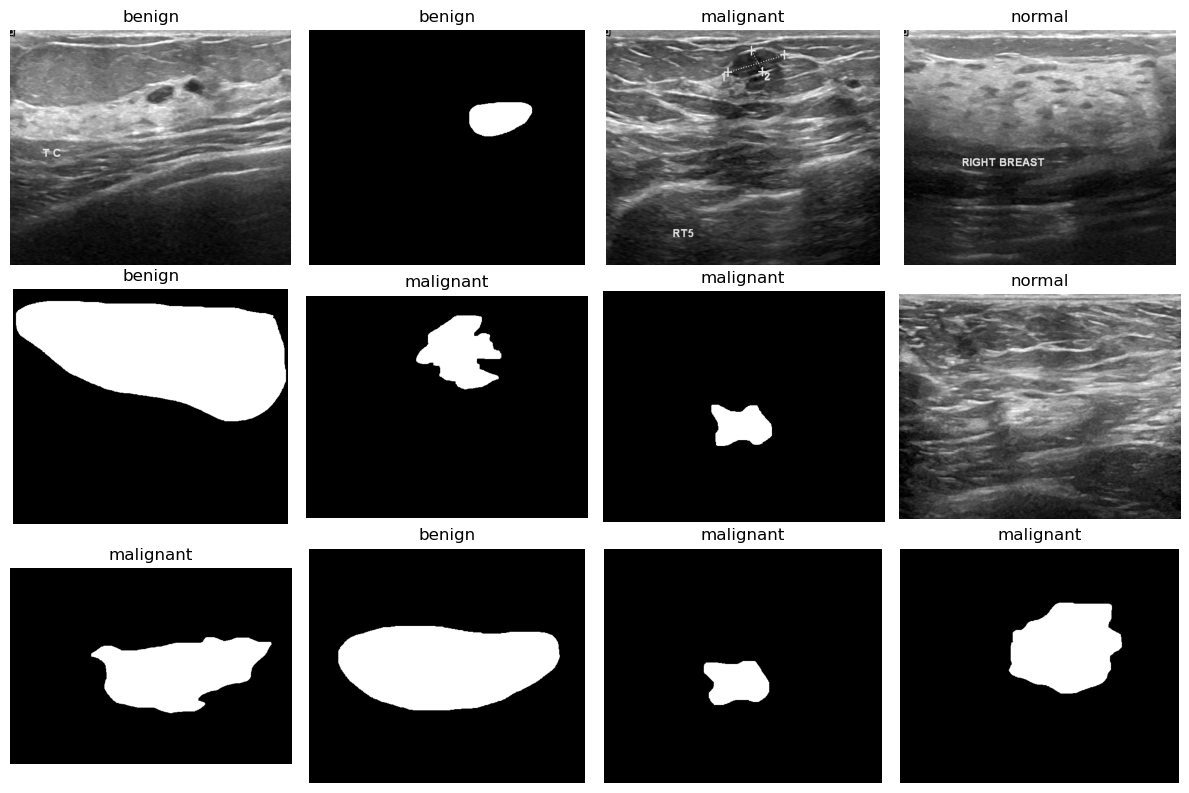

In [3]:
import matplotlib.pyplot as plt
import random

# Define class names
class_names = ['benign', 'malignant', 'normal']

# Create a dictionary to map numerical labels to class names
label_to_class = {i: class_name for i, class_name in enumerate(class_names)}

# Define the number of images to display
num_images = 12

# Randomly select num_images from the image_files list along with their corresponding labels
selected_image_labels = random.sample(list(zip(image_files, labels)), num_images)

# Set up the figure with the correct number of rows and columns
num_rows = 3
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop through the selected images and plot them along with their class names
for i, (image_path, label) in enumerate(selected_image_labels):
    row = i // num_cols
    col = i % num_cols
    image = Image.open(image_path)
    axs[row, col].imshow(image)
    axs[row, col].set_title(label_to_class[np.argmax(label)])  # Set the title as the class name
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [4]:
print(labels.shape)
print(len(image_files))

(1578, 3)
1578


In [5]:
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.01, random_state=42, stratify=labels)


In [6]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1562 1562
16 16


In [7]:
# Define a function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = image.convert('L')
    image = np.array(image)
    image = image.reshape((150, 150, 1))
    image = image.astype('float32') / 255.0
    return image


# def load_preprocess_image(image_path):
#     image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
#     image = tf.keras.preprocessing.image.img_to_array(image)
#     image = image / 255.0
#     return image

X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1562, 150, 150, 1) (1562, 3)
(16, 150, 150, 1) (16, 3)


# Model Training Using CNN

In [9]:
# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add more convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

C:\Users\ustb\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4911 - loss: 1.0196 - val_accuracy: 0.5732 - val_loss: 0.8104
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5776 - loss: 0.8395 - val_accuracy: 0.6688 - val_loss: 0.7273
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7074 - loss: 0.6785 - val_accuracy: 0.6879 - val_loss: 0.7007
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7076 - loss: 0.6242 - val_accuracy: 0.7006 - val_loss: 0.6514
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7289 - loss: 0.5827 - val_accuracy: 0.7134 - val_loss: 0.6227
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 630s 15s/step - accuracy: 0.7652 - loss: 0.4902 - val_accuracy: 0.7707 - val_loss: 0.5370
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7868 - loss: 0.4387 - val_accuracy: 0.8280 - val_loss: 0.5441
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8177 - loss: 0.3840 - val_accuracy: 0.8153 - val_los

In [10]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Training Accuracy:', train_accuracy,"Train loss",train_loss)
print('Testing Accuracy:', test_accuracy,"Test Loss",test_loss)

Training Accuracy: 0.9711908102035522 Train loss 0.11688674241304398
Testing Accuracy: 0.8125 Test Loss 0.6424752473831177


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


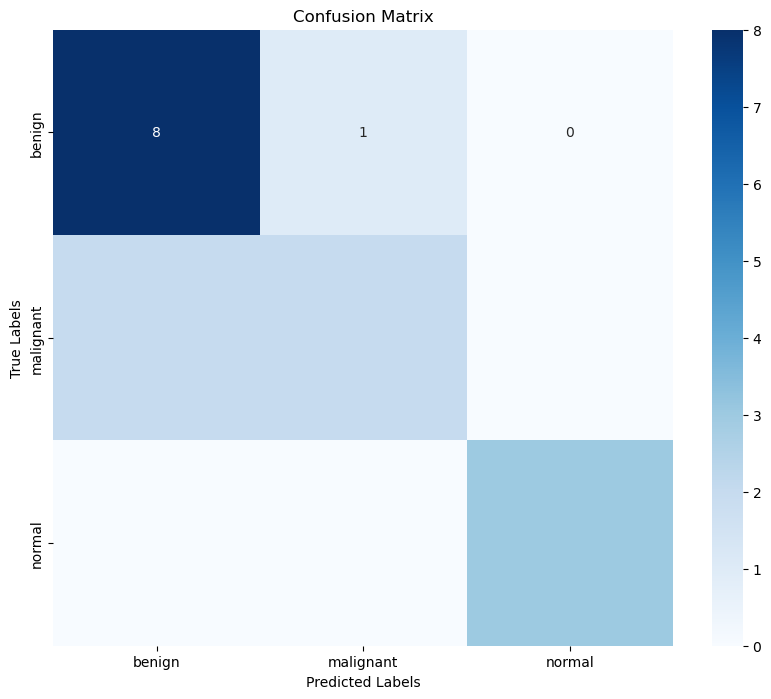

Classification Report:
              precision    recall  f1-score   support

      benign       0.80      0.89      0.84         9
   malignant       0.67      0.50      0.57         4
      normal       1.00      1.00      1.00         3

    accuracy                           0.81        16
   macro avg       0.82      0.80      0.80        16
weighted avg       0.80      0.81      0.80        16



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print('Classification Report:')
print(class_report)


# Model Predicition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


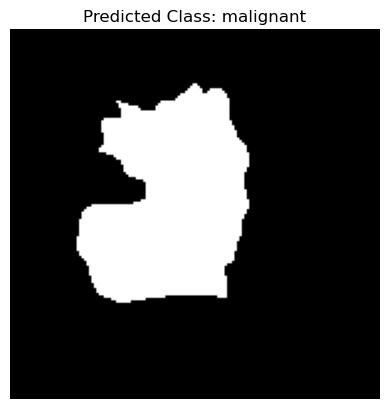

In [19]:
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = "C:/Users/ustb/Desktop/FD khan/Breast Cancer Detection With Image Processing/Dataset/Dataset_BUSI_with_GT/malignant/malignant (103)_mask.png"
image = load_preprocess_image(image_path)
image = np.expand_dims(image, axis=0)  # Add an extra dimension for batch size

# Predict the class probabilities
predicted_probabilities = model.predict(image)

# Get the predicted class index
predicted_class_index = np.argmax(predicted_probabilities[0])

# Map the predicted class index back to its original label
predicted_class_label = label_encoder.classes_[predicted_class_index]

# Plot the image with the predicted class label
plt.imshow(np.squeeze(image), cmap='gray')
plt.title("Predicted Class: " + predicted_class_label)
plt.axis('off')
plt.show()


# Save Model as an HDF5 File via Model.save

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Define and compile your model
classifier = Sequential()
classifier.add(Dense(units=64, activation='relu', input_dim=100))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the model
WORKING_DIR = 'C:/Users/ustb/Desktop/FD khan/Breast Cancer Detection With Image Processing/model'
classifier.save(WORKING_DIR+'/model.h5')


C:\Users\ustb\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# END